In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from utils import plotFigureGray, plotFigure
from student_code import harris_corners, get_keypoints

(-0.5, 1523.5, 2031.5, -0.5)

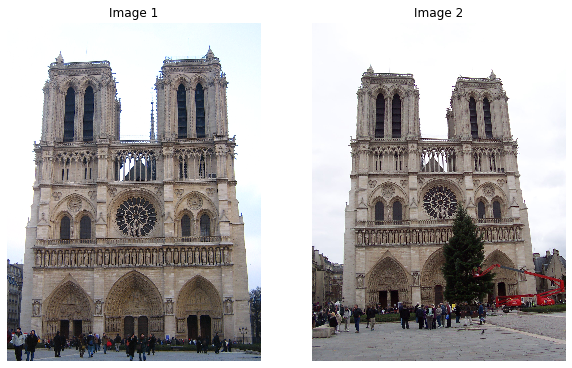

In [2]:
img1 = cv2.imread('../data/notre_dame1.jpg')
img2 = cv2.imread('../data/notre_dame2.jpg')



gray1= cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray1 = np.float32(gray1)

gray2= cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
gray2 = np.float32(gray2)


fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img1[:,:,::-1])#,cmap='gray')
plt.title("Image 1")
plt.axis('off')

ax2 = fig.add_subplot(1,2,2)
ax2.imshow(img2[:,:,::-1])#,cmap='gray')
plt.title("Image 2")
plt.axis('off')
#plt.show()


In [25]:
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img1_gray_blur = cv2.GaussianBlur(img1_gray,(5,5),0)
#img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
Ix = cv2.Sobel(img1_gray_blur,cv2.CV_64F,1,0,ksize=9)
Iy = cv2.Sobel(img1_gray_blur,cv2.CV_64F,0,1,ksize=9)  
Ixy = cv2.Sobel(img1_gray_blur,cv2.CV_64F,1,1,ksize=3) 

In [26]:
#np.gradient(img1)

(-0.5, 1535.5, 2047.5, -0.5)

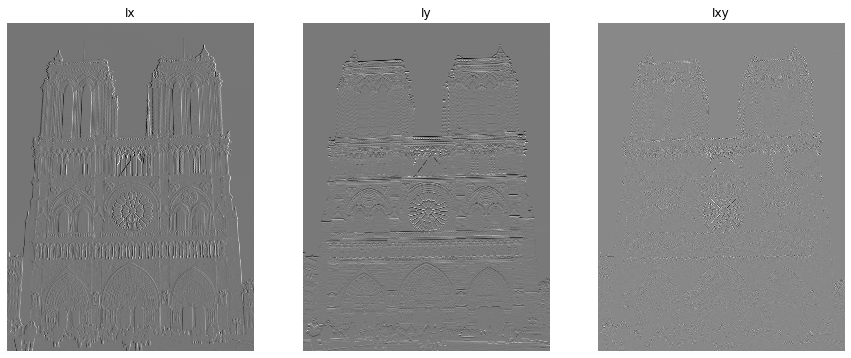

In [28]:
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(Ix,cmap='gray')
plt.title("Ix")
plt.axis('off')
ax2 = fig.add_subplot(1,3,2)
ax2.imshow(Iy,cmap='gray')
plt.title("Iy")
plt.axis('off')
ax3 = fig.add_subplot(1,3,3)
ax3.imshow(Ixy,cmap='gray')
plt.title("Ixy")
plt.axis('off')

In [29]:
Ix.shape

(2048, 1536)

In [30]:
img1_gray_blur.shape

(2048, 1536)

In [31]:
img1_gray.shape

(2048, 1536)

In [37]:
height = img1.shape[0]
width = img1.shape[1]
window_size = 5
corners = []
image2 = img1.copy()
color_img = image2#cv2.cvtColor(image2,cv2.COLOR_GRAY2RGB)
padding = int(window_size/2)
threshold=1e-2
alpha = 0.04

for y in range(padding,height-padding):
  for x in range(padding,width-padding):
    windowIx2 = Ix[y-padding:y+padding+1, x-padding:x+padding+1]
    windowIxy = Ixy[y-padding:y+padding+1, x-padding:x+padding+1]
    windowIy2 = Iy[y-padding:y+padding+1, x-padding:x+padding+1]
    Sx2 = windowIx2.sum()
    Sxy = windowIxy.sum()
    Sy2 = windowIy2.sum()
    # response function
    det = (Sx2 * Sy2) - (Sxy ** 2)
    trace = Sx2 + Sy2
    r = det - alpha*(trace**2)

    #color if greater than threshold
    if r>threshold:
      corners.append([x,y,r])
      color_img.itemset((y, x, 0), 0)
      color_img.itemset((y, x, 1), 0)
      color_img.itemset((y, x, 2), 255)

(-0.5, 1535.5, 2047.5, -0.5)

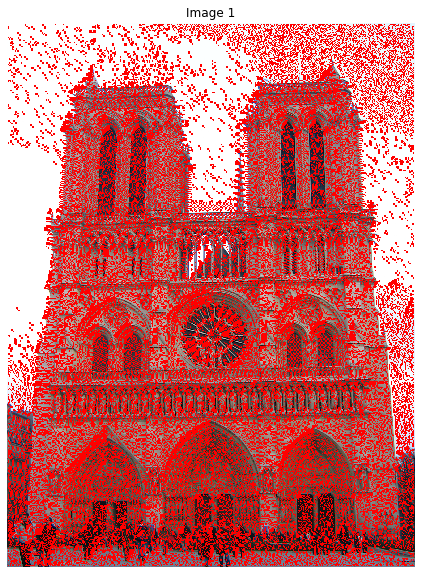

In [38]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(1,1,1)
ax1.imshow(color_img[:,:,::-1])#,cmap='gray')
plt.title("Image 1")
plt.axis('off')

In [ ]:
dy, dx = np.gradient(image)
Ix = dx**2
Iy = dy*dx
Ixy = dy**2
#Ix = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=5)
#Iy = cv2.Sobel(image,cv2.CV_64F,0,1,ksize=5)  
#Ixy = cv2.Sobel(image,cv2.CV_64F,1,1,ksize=5) 
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(Ix[:,:,::-1])#,cmap='gray')
plt.title("Image 1")
plt.axis('off')
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(Iy[:,:,::-1])#,cmap='gray')
plt.title("Image 2")
plt.axis('off')
height = image.shape[0]
width = image.shape[1]

corners = []
image2 = image.copy()
color_img = image2#cv2.cvtColor(image2,cv2.COLOR_GRAY2RGB)
padding = window_size/2

for y in range(padding,height-padding):
  for x in range(padding,width-padding):
    windowIx2 = Ix[y-padding:y+padding+1, x-padding:x+padding+1]
    windowIxy = Ixy[y-padding:y+padding+1, x-padding:x+padding+1]
    windowIy2 = Iy[y-padding:y+padding+1, x-padding:x+padding+1]
    Sx2 = windowIx2.sum()
    Sxy = windowIxy.sum()
    Sy2 = windowIy2.sum()
    # response function
    det = (Sx2 * Sy2) - (Sxy ** 2)
    trace = Sx2 + Sy2
    r = det - alpha*(trace**2)

    #color if greater than threshold
    if r>threshold:
      corners.append([x,y,r])
      color_img.itemset((y, x, 0), 0)
      color_img.itemset((y, x, 1), 0)
      color_img.itemset((y, x, 2), 255)
return corners, Ix, Iy

(-0.5, 1535.5, 2047.5, -0.5)

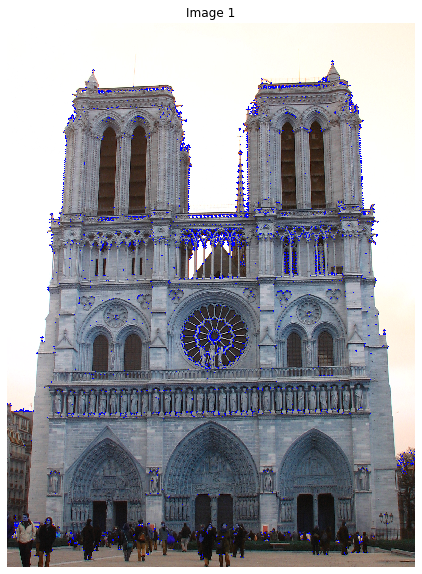

In [41]:
img_harris = img1.copy()
#gray = np.float32(gray)
dst = cv2.cornerHarris(img1_gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img_harris[dst>0.01*dst.max()]=[0,0,255]
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(1,1,1)
ax1.imshow(img_harris,cmap='gray')
plt.title("Image 1")
plt.axis('off')